# 

# 2019-2020 National Survey of Children's Health (NSCH)

In order to download, go to the link https://www.childhealthdata.org/help/dataset and submit your request for the data. In my case, I requested the data for a class project. The dataset has a sample size of 72210 children. I will only be using three of columns for this analysis, but the dataset consists of around 800 columns, including demographic data, community data, health data, and more.

Do parents who were born outside the United States breastfeed longer than parents who both were born in the United States? Are parents born outside the United States more likely to breastfeed at all?

In [81]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from scipy.stats import chi2_contingency as chi2

nsch = pd.read_csv('2019-2020_NSCH_CSV_CAHMI_DRC/2019-2020 NSCH_Topical_CAHMI_DRC.csv')
nsch

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,npm9bullied_1920,npm9bully_1920,npm10PrVi_1920,npm11MHCSHCN_1920,npm11MHnonCSHCN_1920,npm12TransCSHCN_1920,npm12TransNonCSHCN_1920,npm13_2DePrev_1920,npm14_2Smoke_1920,npm15AdIns_1920
0,1,1,19000167,3,2,3,1,17,1,95,...,1,1,2,95,1,95,2,1,2,1
1,1,1,19001238,1,4,1,1,4,2,95,...,90,90,95,95,1,90,90,1,2,1
2,1,1,19001344,3,3,1,1,14,1,95,...,2,1,1,95,1,95,2,1,2,2
3,1,1,19001345,3,1,1,1,16,2,95,...,2,1,1,95,1,95,1,1,2,2
4,1,1,19001347,1,1,3,1,5,2,95,...,90,90,95,2,95,90,90,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72205,56,2,20211572,1,1,3,1,4,2,95,...,90,90,95,95,2,90,90,2,2,2
72206,56,2,20214272,2,2,3,3,10,2,95,...,95,95,95,95,1,90,90,1,2,2
72207,56,2,20235143,2,2,2,1,8,1,95,...,95,95,95,95,1,90,90,1,2,2
72208,56,2,20235559,2,1,3,1,7,1,95,...,95,95,95,95,1,90,90,1,2,1


In [82]:
pd.DataFrame.describe(nsch)

,FIPSST,STRATUM,HHID,FORMTYPE,TOTKIDS_R,TENURE,HHLANGUAGE,SC_AGE_YEARS,SC_SEX,K2Q35A_1_YEARS,...,npm9bullied_1920,npm9bully_1920,npm10PrVi_1920,npm11MHCSHCN_1920,npm11MHnonCSHCN_1920,npm12TransCSHCN_1920,npm12TransNonCSHCN_1920,npm13_2DePrev_1920,npm14_2Smoke_1920,npm15AdIns_1920
count,72210.000000,72210.000000,7.221000e+04,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000,...,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000,72210.000000
mean,29.328930,1.076347,1.970175e+07,2.130924,1.846503,1.485985,1.500914,9.469035,1.481692,92.586913,...,55.652943,55.552181,56.542376,72.927157,23.648387,80.545201,65.342155,4.714499,3.942487,1.714901
std,15.799924,0.265554,5.090231e+05,0.822470,0.865593,0.813208,6.236203,5.182155,0.499668,14.627575,...,44.872026,44.987500,46.136246,39.701319,39.802355,29.662618,40.328840,17.919338,14.059754,6.098872
min,1.000000,1.000000,1.900000e+07,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,16.000000,1.000000,1.911378e+07,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,95.000000,...,1.000000,1.000000,1.000000,95.000000,1.000000,90.000000,2.000000,1.000000,2.000000,1.000000
50%,30.000000,1.000000,2.003801e+07,2.000000,2.000000,1.000000,1.000000,10.000000,1.000000,95.000000,...,90.000000,90.000000,95.000000,95.000000,2.000000,90.000000,90.000000,1.000000,2.000000,1.000000
75%,41.000000,1.000000,2.014001e+07,3.000000,2.000000,2.000000,1.000000,14.000000,2.000000,95.000000,...,95.000000,95.000000,95.000000,95.000000,2.000000,95.000000,90.000000,1.000000,2.000000,2.000000
max,56.000000,2.000000,2.024000e+07,3.000000,4.000000,4.000000,99.000000,17.000000,2.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000


In [83]:
# Let's start with the first question...

# create the dataframe with only the columns about...
    # whether parent nativity to America (1=all parents born in US, 2=at least one parent born outside the US)
    # how many months the child was breastfed (1=<6 months, 2= >=6 months, 95=never breastfed)
monthsbreastfeeding_gen = pd.DataFrame(data=nsch, columns=['PrntNativity_1920', 'BrstStop_1920'])

# drop any rows with NaN values
monthsbreastfeeding_gen = monthsbreastfeeding_gen.dropna(how='any')

# drop any rows with parent nativity values not equal to 1 or 2
monthsbreastfeeding_gen.drop(monthsbreastfeeding_gen[monthsbreastfeeding_gen['PrntNativity_1920'] > 2].index, inplace=True)

# drop any rows with months breastfed values == 99 or == 90
monthsbreastfeeding_gen.drop(monthsbreastfeeding_gen[monthsbreastfeeding_gen['BrstStop_1920'] == 99].index, inplace=True)
monthsbreastfeeding_gen.drop(monthsbreastfeeding_gen[monthsbreastfeeding_gen['BrstStop_1920'] == 90].index, inplace=True)

# replace any values of 95 with 0, for the sake of my sanity
monthsbreastfeeding_gen['BrstStop_1920'].replace([95], 0, inplace=True)

monthsbreastfeeding_gen

,PrntNativity_1920,BrstStop_1920
1,1,0
4,1,0
5,1,2
6,1,0
11,1,0
...,...,...
72201,1,2
72202,1,1
72203,1,2
72205,1,2


In [52]:
# This is basically a pivot, but I will include an actual pivot later.
# Also for the sake of my sanity I renamed the labels on the columns and indices.
cmonthsbreastfeeding_gen = pd.crosstab(index=monthsbreastfeeding_gen['BrstStop_1920'], columns=monthsbreastfeeding_gen['PrntNativity_1920'], normalize='columns')
cmonthsbreastfeeding_gen.rename(columns={1:"Both parents born in US", 2:"One or both parents born outside US"}, inplace=True)
cmonthsbreastfeeding_gen.rename(index={0:"Never breastfed", 1:"<6 months breastfeeding", 2:"≥6 months breastfeeding"}, inplace=True)
cmonthsbreastfeeding_gen

PrntNativity_1920,Both parents born in US,One or both parents born outside US
BrstStop_1920,,
Never breastfed,0.144329,0.107720
<6 months breastfeeding,0.316998,0.302813
≥6 months breastfeeding,0.538673,0.589467


<AxesSubplot:xlabel='PrntNativity_1920', ylabel='BrstStop_1920'>

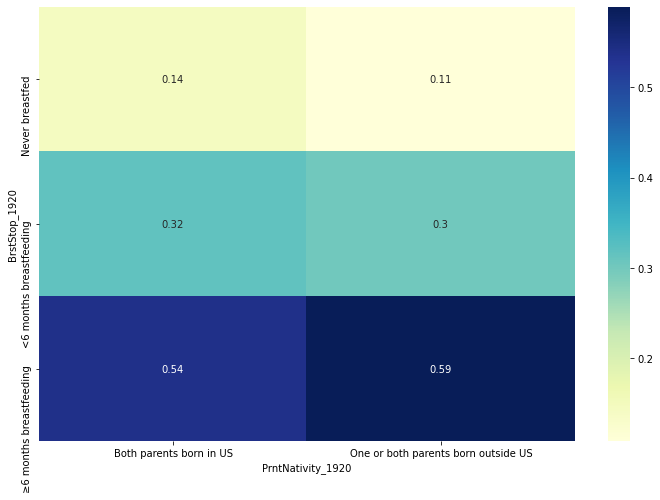

In [53]:
# Let's play with a heatmap from seaborn
# I know you technically can make a heatmap with matplotlib, but it's so cumbersome compared to seaborn.
# This is my "simple plot of part of the data", I got permission.
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(cmonthsbreastfeeding_gen, annot=True, cmap="YlGnBu")

In [54]:
# But is it actually significant?
# I did some research and considering the differences in sample sizes, etc., the most appropriate test is a chi^2 test.
# So I added the chi2_contingency function from scipy to the import list.
c, p, dof, expected = chi2(cmonthsbreastfeeding_gen)
print("Chi2 value = " + str(c) + "\np-value = " + str(p) + "\nDegrees of freedom = " + str(dof) + "\nExpected = \n" + str(expected) + "\n\nThe difference is not significant.")

Chi2 value = 0.007928811555523845
p-value = 0.9960434421046681
Degrees of freedom = 2
Expected = 
[[0.12602424 0.12602424]
 [0.30990533 0.30990533]
 [0.56407044 0.56407044]]

The difference is not significant.


In [55]:
# Even if the crosstab was basically a pivot, I still am including the obligatory pivot, this time with counting the frequency.
pmonthsbreastfeeding_gen = monthsbreastfeeding_gen.pivot_table(index='BrstStop_1920', columns='PrntNativity_1920', aggfunc=len)
pmonthsbreastfeeding_gen.rename(columns={1:"All parents born in US", 2:"One or both parents born outside US"}, inplace=True)
pmonthsbreastfeeding_gen.rename(index={0:"Never breastfed", 1:"<6 months", 2:"≥6 months"}, inplace=True)
pmonthsbreastfeeding_gen

PrntNativity_1920,All parents born in US,One or both parents born outside US
BrstStop_1920,,
Never breastfed,2200,360
<6 months,4832,1012
≥6 months,8211,1970


<ipython-input-80-cc3174dcd25d>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


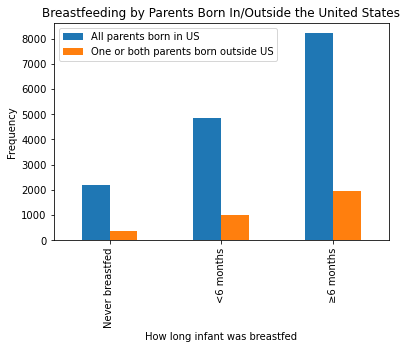

In [80]:
# Let's try plotting this with a grouped bar plot, since that seems most appropriate for the data.
ax = pmonthsbreastfeeding_gen.plot(kind="bar", legend=False)
fig = ax.get_figure()
ax.set_title("Breastfeeding by Parents Born In/Outside the United States")
ax.set_xlabel("How long infant was breastfed")
ax.set_ylabel("Frequency")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
fig.show()

In [57]:
# Hmmm... that previous plot didn't really seem to reflect the data so much as the different sample sizes.
# Let's make those numbers into percentages.
ppmonthsbreastfeeding_gen = (pmonthsbreastfeeding_gen / pmonthsbreastfeeding_gen.sum()) * 100
ppmonthsbreastfeeding_gen

PrntNativity_1920,All parents born in US,One or both parents born outside US
BrstStop_1920,,
Never breastfed,14.432854,10.771993
<6 months,31.699797,30.281269
≥6 months,53.867349,58.946738


<ipython-input-58-c988cdce60f1>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


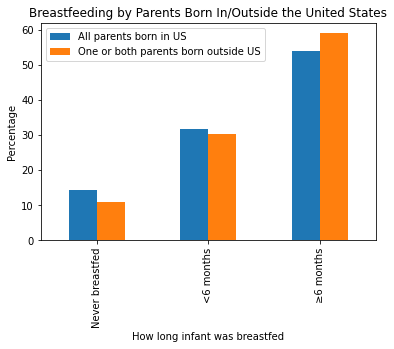

In [58]:
# This is so much better.
ax = ppmonthsbreastfeeding_gen.plot(kind="bar", legend=False)
fig = ax.get_figure()
ax.set_title("Breastfeeding by Parents Born In/Outside the United States")
ax.set_xlabel("How long infant was breastfed")
ax.set_ylabel("Percentage")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
fig.show()

In [59]:
# Let's move onto whether immigrants are more likely to ever breastfeed their child.
# We'll have to once again start with creating the dataframe and cleaning the data.

# create the dataframe with only the columns about...
    # whether parent nativity to America (1=all parents born in US, 2=at least one parent born outside the US)
    # whether the child was ever breastfed (1=yes, 2=no)
everbreastfed_gen = pd.DataFrame(data=nsch, columns=['PrntNativity_1920', 'BrstEver_1920'])

# drop any rows with NaN values
everbreastfed_gen = everbreastfed_gen.dropna(how='any')

# drop any rows with parent nativity values not equal to 1 or 2
everbreastfed_gen.drop(everbreastfed_gen[everbreastfed_gen['PrntNativity_1920'] > 2].index, inplace=True)

# drop any rows with ever breastfed values not equal to 1 or 2
everbreastfed_gen.drop(everbreastfed_gen[everbreastfed_gen['BrstEver_1920'] > 2].index, inplace=True)

#print the result
everbreastfed_gen

,PrntNativity_1920,BrstEver_1920
1,1,2
4,1,2
5,1,1
6,1,2
11,1,2
...,...,...
72201,1,1
72202,1,1
72203,1,1
72205,1,1


In [60]:
# Now we calculate the chi2 values from the crosstabulation.
ceverbreastfed_gen = pd.crosstab(index=everbreastfed_gen['BrstEver_1920'], columns=everbreastfed_gen['PrntNativity_1920'], normalize='columns')

# And for the sake of my sanity, we'll rename the columns and indices.
ceverbreastfed_gen.rename(columns={1:"Both parents born in US", 2:"One or both parents born outside US"}, inplace=True)
ceverbreastfed_gen.rename(index={1:"Breastfed", 2:"Never breastfed"}, inplace=True)

ceverbreastfed_gen

PrntNativity_1920,Both parents born in US,One or both parents born outside US
BrstEver_1920,,
Breastfed,0.856584,0.892953
Never breastfed,0.143416,0.107047


<AxesSubplot:xlabel='PrntNativity_1920', ylabel='BrstEver_1920'>

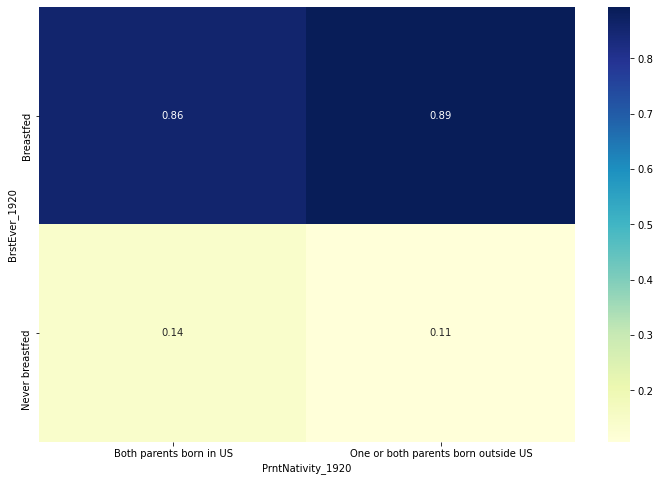

In [61]:
# Just for fun, let's do a heatmap from seaborn.
plt.pyplot.figure(figsize=(12,8))
sns.heatmap(ceverbreastfed_gen, annot=True, cmap="YlGnBu")

In [62]:
# Now for the chi squared...
c, p, dof, expected = chi2(ceverbreastfed_gen)
print("Chi2 value = " + str(c) + "\np-value = " + str(p) + "\nDegrees of freedom = " + str(dof) + "\nExpected = \n" + str(expected) + "\n\nThe difference is significant.")

Chi2 value = 4.238233426892641
p-value = 0.03952327172969258
Degrees of freedom = 1
Expected = 
[[0.87476841 0.87476841]
 [0.12523159 0.12523159]]

The difference is significant.


In [63]:
# We can repeat the obligatory pivot, this time with percentages from the beginning
peverbreastfed_gen = everbreastfed_gen.pivot_table(index='BrstEver_1920', columns='PrntNativity_1920', aggfunc=len)
peverbreastfed_gen.rename(columns={1:"All parents born in US", 2:"One or both parents born outside US"}, inplace=True)
peverbreastfed_gen.rename(index={1:"Breastfed", 2:"Never breastfed"}, inplace=True)
ppeverbreastfed_gen = (peverbreastfed_gen / peverbreastfed_gen.sum()) * 100
ppeverbreastfed_gen

PrntNativity_1920,All parents born in US,One or both parents born outside US
BrstEver_1920,,
Breastfed,85.658409,89.295272
Never breastfed,14.341591,10.704728


<ipython-input-64-18eb0b51029f>:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


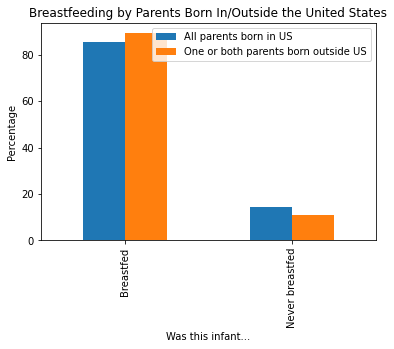

In [64]:
# And now we plot.
ax = ppeverbreastfed_gen.plot(kind="bar", legend=False)
fig = ax.get_figure()
ax.set_title("Breastfeeding by Parents Born In/Outside the United States")
ax.set_xlabel("Was this infant...")
ax.set_ylabel("Percentage")
patches, labels = ax.get_legend_handles_labels()
ax.legend(patches, labels, loc='best')
fig.show()

In [76]:
maternalage_everbreastfed = pd.DataFrame(data=nsch, columns=['MOMAGE', 'BrstEver_1920'])

# drop any rows with NaN values
maternalage_everbreastfed = maternalage_everbreastfed.dropna(how='any')

# drop any rows with ever breastfed values not equal to 1 or 2
maternalage_everbreastfed.drop(maternalage_everbreastfed[maternalage_everbreastfed['BrstEver_1920'] > 2].index, inplace=True)

# drop any rows with ever breastfed values not equal to 1 or 2
maternalage_everbreastfed.drop(maternalage_everbreastfed[maternalage_everbreastfed['MOMAGE'] == 99].index, inplace=True)

# Obligatory group by
grouped = maternalage_everbreastfed.groupby(by=['MOMAGE']).count()

grouped


,BrstEver_1920
MOMAGE,
18,244
19,235
20,305
21,420
22,406
23,518
24,652
25,796
26,877


# Results of data analysis
My analysis of the data found that parental nativity to the United States had no significant correlation with how long an infant was breastfed, but there was a significant correlation with whether an infant was breastfed at at all (p=0.04).